In [1]:
import sys
sys.path.append('..')

In this very simple example, we create a synthetic prediction (which is a set of Gaussian distributions), plot them, and recalibrate them with conformal calibration. `

In [44]:
import torch, torchuq
predictions = torch.distributions.normal.Normal(loc=torch.zeros(50), scale=torch.ones(50))
labels = predictions.sample_n(1).flatten() + 1 # We intentially move the samples so the predictions are incorrect. 

We can plot the Gaussian distributions that we have created as a sequence of PDFs, and the samples as the cross-shaped markers. 

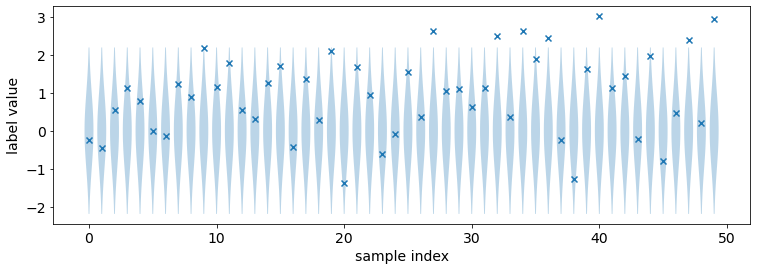

In [48]:
torchuq.evaluate.distribution.plot_density_sequence(predictions, labels);

We intentionally use incorrect samples, so as expected, the distribution does not match the samples very well. We Will recalibrate the distribution to match the samples again. A powerful recalibration algorithm is the conformal calibration algorithm. It takes as input the predictions and the labels, and learns a recalibration map that can be applied to new data (here for illustration purposes we apply it to the original data). 

In [46]:
calibrator = torchuq.transform.conformal.ConformalCalibrator(input_type='distribution')
calibrator.train(predictions, labels)
adjusted_predictions = calibrator(predictions)

We can visualize the predictions again, and as can be seen, these prediction match the labels much better. 

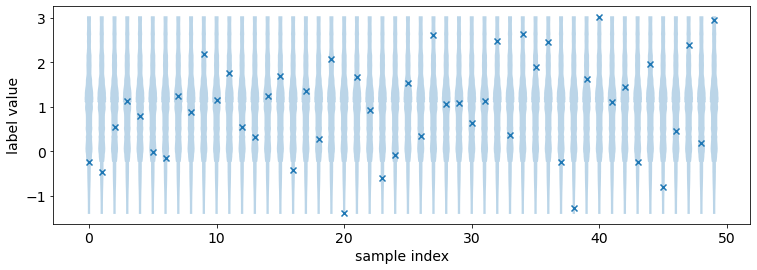

In [47]:
torchuq.evaluate.distribution.plot_density_sequence(adjusted_predictions, labels, smooth_bw=10);